# Wind Analysis

This notebook outlines a good example of getting started for the wind analysis. It demonstrates a couple of new, powerful tools and an example of the processing and plotting.

First, import the packages that we will be using. One new package we will be using is xarray. It is designed for working with oceanographic and other earth science datasets, particularly
netCDF, HDF5 (common in satellite/NASA products), and other multi-dimensional data.
It will also introduce matplotlib, a basic plotting library that produces nice looking graphs and figures

In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
# This is so figures will display in the notebook without an explicit disp(figure)
%matplotlib inline

### Example of Good Dataset: Southern Ocean Deployment 2 System 1
First, we're going to load, examine, process, and plot an example of a "good" dataset from the Southern Ocean Surface Mooring Deployment 2 METBK 1 (reference designator: GS01SUMO-SBD11-05-METBKA0001)

In [2]:
# Load the dataset
filepath = '/home/jovyan/wind_comparisons/data/modules/GS01SUMO/R00004/SWND233.nc'
data = xr.open_dataset(filepath)

# Examine the dataset
data.load()

<xarray.Dataset> Size: 23MB
Dimensions:     (time: 240420)
Coordinates:
  * time        (time) datetime64[ns] 2MB 2021-05-10T12:59:59.999996672 ... 2...
Data variables:
    compass     (time) float64 2MB 0.0 0.0 0.0 0.0 ... 123.8 108.8 83.5 120.9
    lxydir      (time) float64 2MB 0.0 0.0 0.0 0.0 ... 238.2 257.9 251.8 250.5
    spdmax      (time) float64 2MB 0.0 0.0 0.0 0.0 0.0 ... 10.6 11.8 10.8 10.6
    svel        (time) float64 2MB 0.0 0.0 0.0 0.0 ... 333.3 333.1 333.1 333.1
    temp        (time) float64 2MB 0.0 0.0 0.0 0.0 0.0 ... 2.62 2.35 2.37 2.35
    tiltx       (time) float64 2MB 0.0 0.0 0.0 0.0 0.0 ... 3.0 0.2 -1.2 -1.8 0.6
    tilty       (time) float64 2MB 0.0 0.0 0.0 0.0 0.0 ... -4.0 -6.8 -5.4 -3.6
    wnde        (time) float64 2MB 0.0 0.0 0.0 0.0 0.0 ... 2.2 2.13 1.97 3.08
    wndn        (time) float64 2MB 0.0 0.0 0.0 0.0 0.0 ... 8.03 6.77 7.79 7.76
    wspd        (time) float64 2MB 0.0 0.0 0.0 0.0 0.0 ... 8.8 9.4 10.0 9.2 8.8
    deployment  (time) int64 2MB 4 4 4 4 4 4 4 4 4 4 4 ... 4 4 4 4 4 4 4 4 4 4 4
Attributes: (12/14)
    header:                MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on...
    version:               2018/10/18
    globals:               []
    serial_number:         233
    program:               /home/jovyan/wind_comparisons/scripts/decode_stand...
    runtime:               06-Jun-2024 16:00:09
    ...                    ...
    detailed_information:  http://uop.whoi.edu/UOPinstruments/frodo/asimet
    manufacturer:          Gill Instruments
    model:                 WindObserver II Ultrasonic Anemometer
    range:                 0 to 65 m/s (wind speed), 0 to 360 deg (direction)
    resolution:            0.01 m/s, 0.1 deg
    accuracy:              Manufacturer spec, 2%, 2 degrees

Notice that the dataset has the following "catgories": **Dimensions**, **Coordinates**, **Data variables**, **Indexes**, and **Attributes**. You can read about what each of the categories means in the [xarray documentation](https://docs.xarray.dev/en/stable/user-guide/terminology.html).

In order to reproduce the comparison of scalar wind speed against vector wind speed, we want to find which variables in the dataset represent those data. We can click on the ```Show/Hide Attributes``` button on the far side of each **Data variable** to read the _metadata_ about that variable and learn more about it. We can go ahead and click on _wspd_ variable and see that it is the Scalar averaged wind speed over one minute.

In [3]:
data

<xarray.Dataset> Size: 23MB
Dimensions:     (time: 240420)
Coordinates:
  * time        (time) datetime64[ns] 2MB 2021-05-10T12:59:59.999996672 ... 2...
Data variables:
    compass     (time) float64 2MB 0.0 0.0 0.0 0.0 ... 123.8 108.8 83.5 120.9
    lxydir      (time) float64 2MB 0.0 0.0 0.0 0.0 ... 238.2 257.9 251.8 250.5
    spdmax      (time) float64 2MB 0.0 0.0 0.0 0.0 0.0 ... 10.6 11.8 10.8 10.6
    svel        (time) float64 2MB 0.0 0.0 0.0 0.0 ... 333.3 333.1 333.1 333.1
    temp        (time) float64 2MB 0.0 0.0 0.0 0.0 0.0 ... 2.62 2.35 2.37 2.35
    tiltx       (time) float64 2MB 0.0 0.0 0.0 0.0 0.0 ... 3.0 0.2 -1.2 -1.8 0.6
    tilty       (time) float64 2MB 0.0 0.0 0.0 0.0 0.0 ... -4.0 -6.8 -5.4 -3.6
    wnde        (time) float64 2MB 0.0 0.0 0.0 0.0 0.0 ... 2.2 2.13 1.97 3.08
    wndn        (time) float64 2MB 0.0 0.0 0.0 0.0 0.0 ... 8.03 6.77 7.79 7.76
    wspd        (time) float64 2MB 0.0 0.0 0.0 0.0 0.0 ... 8.8 9.4 10.0 9.2 8.8
    deployment  (time) int64 2MB 4 4 4 4 4 4 4 4 4 4 4 ... 4 4 4 4 4 4 4 4 4 4 4
Attributes: (12/14)
    header:                MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on...
    version:               2018/10/18
    globals:               []
    serial_number:         233
    program:               /home/jovyan/wind_comparisons/scripts/decode_stand...
    runtime:               06-Jun-2024 16:00:09
    ...                    ...
    detailed_information:  http://uop.whoi.edu/UOPinstruments/frodo/asimet
    manufacturer:          Gill Instruments
    model:                 WindObserver II Ultrasonic Anemometer
    range:                 0 to 65 m/s (wind speed), 0 to 360 deg (direction)
    resolution:            0.01 m/s, 0.1 deg
    accuracy:              Manufacturer spec, 2%, 2 degrees

Similarly, we can click on the other data variable's attributes and learn that the other two variables we want are _wnde_, the East Wind vector value, and _wndn_, the North Wind vector value.

There remains one more step before we can get to plotting a comparison, and that is to calculate the vector wind speed average for comparison with the scalar wind speed. If we remember Calculus, we know that:

$$
\|{U}\| = \sqrt{u^{2} + v^{2}}
$$

where $\|{U}\|$ is the magnitude of the wind speed, $u$ is the eastward vector wind speed, and $v$ is the northward vector wind speed. So we can go ahead and calculate that:

In [4]:
wvec = np.sqrt(data["wnde"]**2 + data["wndn"]**2)
wvec

<xarray.DataArray (time: 240420)> Size: 2MB
array([0.        , 0.        , 0.        , ..., 7.09716845, 8.03523491,
       8.34889214])
Coordinates:
  * time     (time) datetime64[ns] 2MB 2021-05-10T12:59:59.999996672 ... 2021...

And we can add the calculate vector wind speed to the dataset to make it easier to access and keep our workspace clean

In [5]:
# Add the calculated results
data["wvec"] = wvec
# Add some metadata so we can remember what we did
data["wvec"].attrs = {
    'long_name': 'Vector Wind Speed',
    'units': 'm/s',
    'methodology': 'This is the magnitude of the east and north wind vectors'
}

In [6]:
data

<xarray.Dataset> Size: 25MB
Dimensions:     (time: 240420)
Coordinates:
  * time        (time) datetime64[ns] 2MB 2021-05-10T12:59:59.999996672 ... 2...
Data variables:
    compass     (time) float64 2MB 0.0 0.0 0.0 0.0 ... 123.8 108.8 83.5 120.9
    lxydir      (time) float64 2MB 0.0 0.0 0.0 0.0 ... 238.2 257.9 251.8 250.5
    spdmax      (time) float64 2MB 0.0 0.0 0.0 0.0 0.0 ... 10.6 11.8 10.8 10.6
    svel        (time) float64 2MB 0.0 0.0 0.0 0.0 ... 333.3 333.1 333.1 333.1
    temp        (time) float64 2MB 0.0 0.0 0.0 0.0 0.0 ... 2.62 2.35 2.37 2.35
    tiltx       (time) float64 2MB 0.0 0.0 0.0 0.0 0.0 ... 3.0 0.2 -1.2 -1.8 0.6
    tilty       (time) float64 2MB 0.0 0.0 0.0 0.0 0.0 ... -4.0 -6.8 -5.4 -3.6
    wnde        (time) float64 2MB 0.0 0.0 0.0 0.0 0.0 ... 2.2 2.13 1.97 3.08
    wndn        (time) float64 2MB 0.0 0.0 0.0 0.0 0.0 ... 8.03 6.77 7.79 7.76
    wspd        (time) float64 2MB 0.0 0.0 0.0 0.0 0.0 ... 8.8 9.4 10.0 9.2 8.8
    deployment  (time) int64 2MB 4 4 4 4 4 4 4 4 4 4 4 ... 4 4 4 4 4 4 4 4 4 4 4
    wvec        (time) float64 2MB 0.0 0.0 0.0 0.0 ... 8.326 7.097 8.035 8.349
Attributes: (12/14)
    header:                MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on...
    version:               2018/10/18
    globals:               []
    serial_number:         233
    program:               /home/jovyan/wind_comparisons/scripts/decode_stand...
    runtime:               06-Jun-2024 16:00:09
    ...                    ...
    detailed_information:  http://uop.whoi.edu/UOPinstruments/frodo/asimet
    manufacturer:          Gill Instruments
    model:                 WindObserver II Ultrasonic Anemometer
    range:                 0 to 65 m/s (wind speed), 0 to 360 deg (direction)
    resolution:            0.01 m/s, 0.1 deg
    accuracy:              Manufacturer spec, 2%, 2 degrees

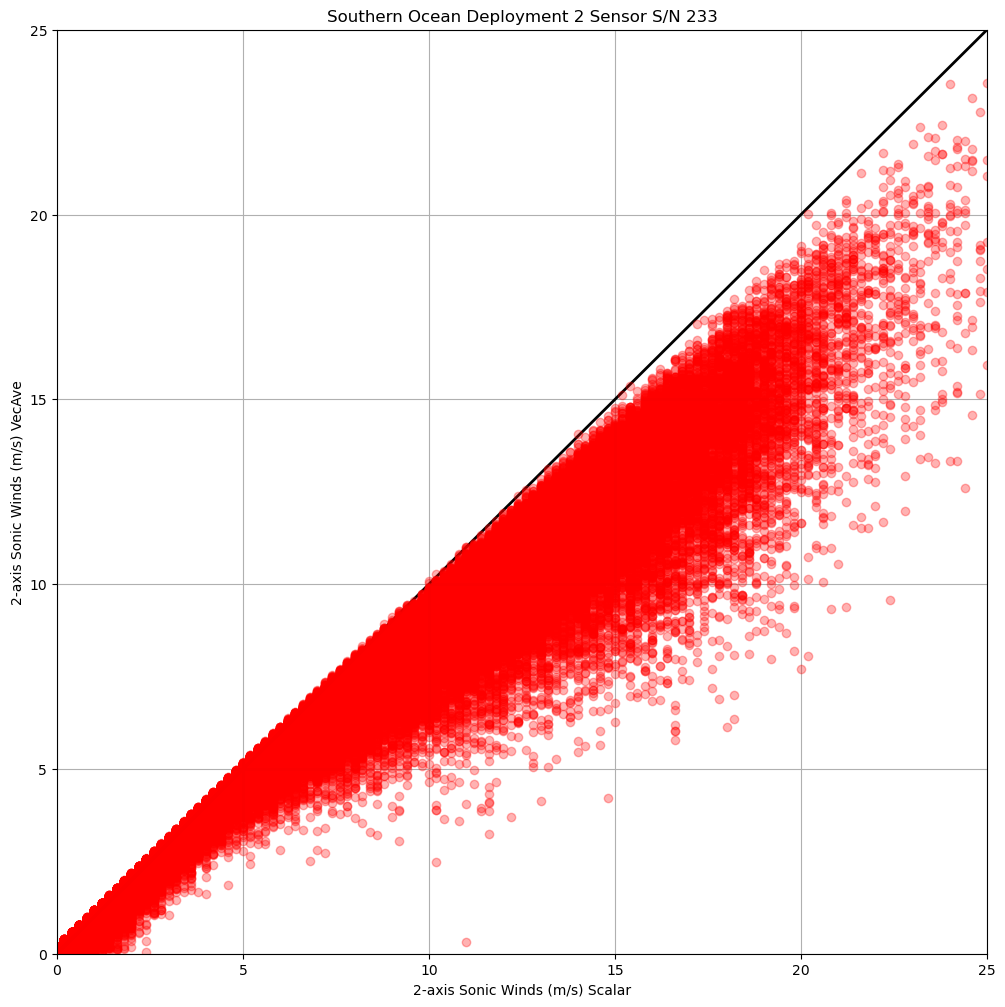

In [7]:
# Now we can go ahead and plot the data
fig, ax = plt.subplots(figsize=(12, 12))

# Create a one:one line
x = np.arange(0, 31, 1)
y = np.arange(0, 31, 1)

# Plot the one:one line
ax.plot(x, y, color="black", linewidth=2)

# Plot the comparison
ax.plot(data["wspd"], data["wvec"], marker='o', linestyle='', color="red", alpha=0.3) # Alpha controls transparency, 1=solid, 0=transparent

# Set some limits on the figure
ax.set_xlim((0,25))
ax.set_ylim((0,25))

# Add in title, axis labels, and grid lines
ax.set_title(f'Southern Ocean Deployment 2 Sensor S/N {data.attrs["serial_number"]}') # f-strings are a way to substitute a variable into a string and have it print out
ax.set_xlabel('2-axis Sonic Winds (m/s) Scalar')
ax.set_ylabel('2-axis Sonic Winds (m/s) VecAve')
ax.grid()

Great! We now have a comparison plot. But to reproduce what is in the report, we also want to calculate the median value and standard deviation for the vector wind average based on the scalar wind speed.

In order to calculate these values, we are going to make use of the powerful [```groupby```](https://docs.xarray.dev/en/latest/user-guide/groupby.html#) method, which allows you to utilize the **split-apply-combine** strategy. Our strategy is going to be:
1. Group the dataset by the _wspd_ data. We are going to split the dataset into equally-spaced bins based on the scalar wind speed data using the ```groupby_bins``` method in ```xarray```
2. Apply calculations to the grouped data. We want the following values:
    * Mean of _wspd_
    * Median of _wvec_ ($\text{med}(U)$)
    * Mean of _wvec_ ($\bar{U}$)
    * Median standard deviation (msd) of _wvec_. This is calculated as:
$$
\text{msd} = \sqrt{ (\bar{U} - \text{med}(U))^{2} }
$$

3. Plot the data with the binned data

In [8]:
# First, create the bins we want to group the data into
bins = np.arange(0, 31, 1)
bins

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

Now group the data into the bins we defined above

In [9]:
grouped = data.groupby_bins(group='wspd', bins=bins)
grouped

DatasetGroupBy, grouped over 'wspd_bins'
30 groups with labels (0,, 1], (1,, 2], ..., (29,, 30].

Calculate our statistical values

In [10]:
# Start with mean of wspd
wspd_avg = grouped.mean()['wspd']

# Next is the median of the vector wind speed
wvec_med = grouped.median()['wvec']

In [11]:
# To calculate the median standard deviation, we are going to have to write our own function to apply to the grouped data.
def msd(grouped):
    # First, calculate the mean of the vector winds
    wvec_avg = grouped.mean()['wvec']
    
    # Next, calculate the median
    wvec_med = grouped.median()['wvec']
    
    # Use those results to calculate the median standard deviation
    med_std = np.sqrt((wvec_avg - wvec_med)**2)
    
    # Return the results - this is needed to get the result out of the function
    return med_std

In [12]:
# Calculate the median standard deviation
wvec_msd = msd(grouped)
wvec_msd

<xarray.DataArray 'wvec' (wspd_bins: 30)> Size: 240B
array([0.01027029, 0.01033377, 0.01271131, 0.0022648 , 0.00921849,
       0.01959747, 0.04508281, 0.07615286, 0.10379786, 0.13064652,
       0.15576381, 0.17798282, 0.1951347 , 0.19797615, 0.18956661,
       0.21831551, 0.24320917, 0.25273727, 0.2495552 , 0.22870669,
       0.24952405, 0.24351543, 0.05979435, 0.5460313 , 0.17925448,
       0.17240387, 1.5329016 , 0.78478223,        nan,        nan])
Coordinates:
  * wspd_bins  (wspd_bins) object 240B (0, 1] (1, 2] ... (28, 29] (29, 30]

Yay! We now have all of the necessary data to reproduce the figure from the report 3305-000207. So lets do it.

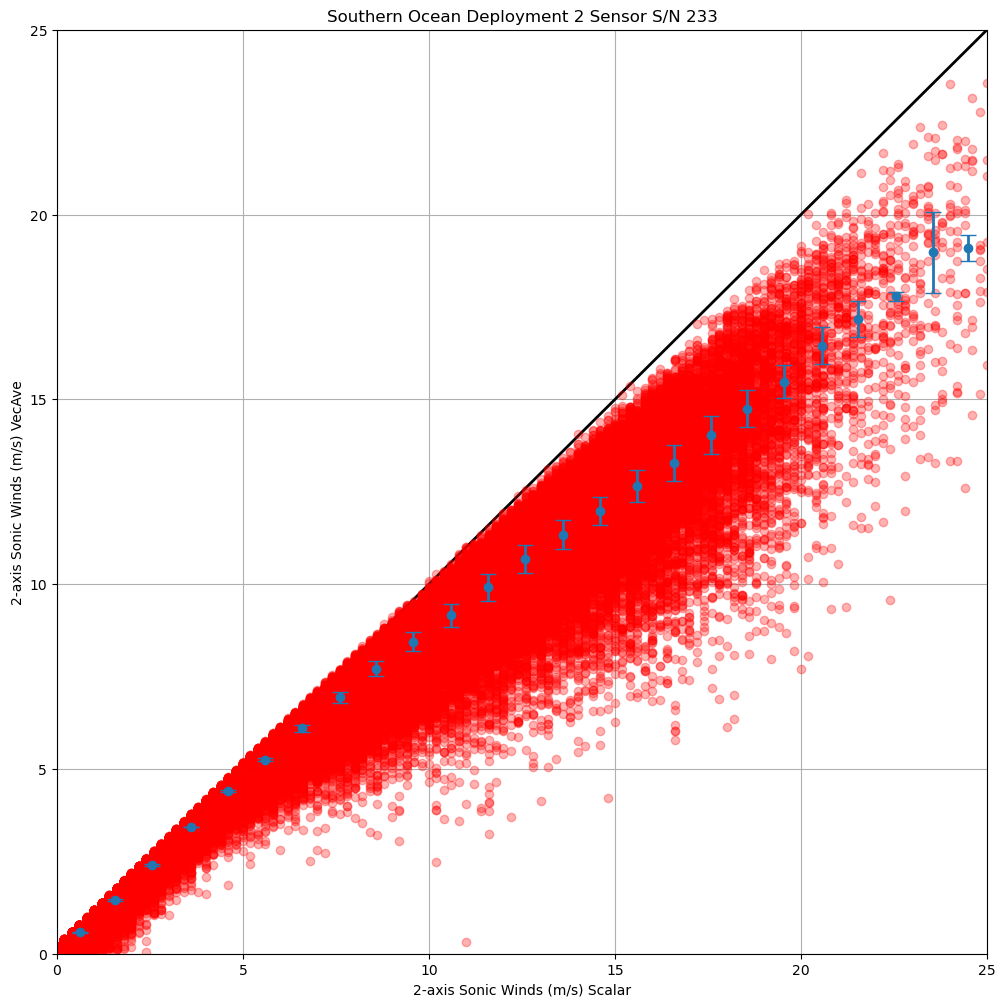

In [13]:
fig, ax = plt.subplots(figsize=(12, 12))

# Create a one:one line
x = np.arange(0, 31, 1)
y = np.arange(0, 31, 1)

# Plot the one:one line
ax.plot(x, y, color="black", linewidth=2)

# Plot the comparison
ax.plot(data["wspd"], data["wvec"], marker='o', linestyle='', color="red", alpha=0.3) # Alpha controls transparency, 1=solid, 0=transparent

# Plot the bins with error bars
ax.errorbar(x=wspd_avg, y=wvec_med, yerr=2*wvec_msd, fmt='o', linewidth=2, capsize=6)
# Set some limits on the figure
ax.set_xlim((0,25))
ax.set_ylim((0,25))

# Add in title, axis labels, and grid lines
ax.set_title(f'Southern Ocean Deployment 2 Sensor S/N {data.attrs["serial_number"]}') # f-strings are a way to substitute a variable into a string and have it print out
ax.set_xlabel('2-axis Sonic Winds (m/s) Scalar')
ax.set_ylabel('2-axis Sonic Winds (m/s) VecAve')
ax.grid()

Now we want to save the above figure. We'll do this to the same directory where we have the netCDF file. First we'll specify the filepath and create a figure name.

In [14]:
# First come up with the figure filepath and filename
dirname, basename = os.path.dirname(filepath), os.path.basename(filepath)
# Replace the basename
basename = basename.replace(".nc","")

# Use string concatentation to make the figure filepath
figure_path = dirname + "/" + basename + ".png"
print(figure_path)

/home/jovyan/wind_comparisons/data/modules/GS01SUMO/R00004/SWND233.png


Save the figure

In [15]:
fig.savefig(figure_path, format="png", transparent=False, facecolor="white", edgecolor="black")